In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn --upgrade
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [2]:
# Import the database
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Let's check if there is missing values

In [4]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Let's encode the categorical variables

In [5]:
df_encoded = df.replace({'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0, 'Male': 1, 'Female': 0})

In [6]:
df_encoded.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Let's try some data exploration now to see if we can find some links between the features

<function matplotlib.pyplot.show(close=None, block=None)>

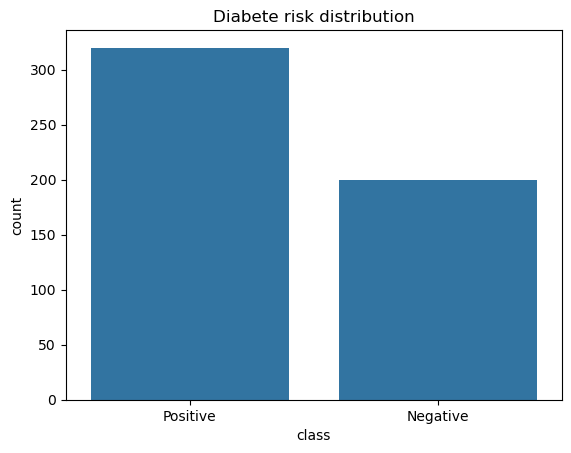

In [7]:
sns.countplot(x='class', data = df)
plt.title('Diabete risk distribution')
plt.show

Let's check the relationship between variables with a correlation heatmap :

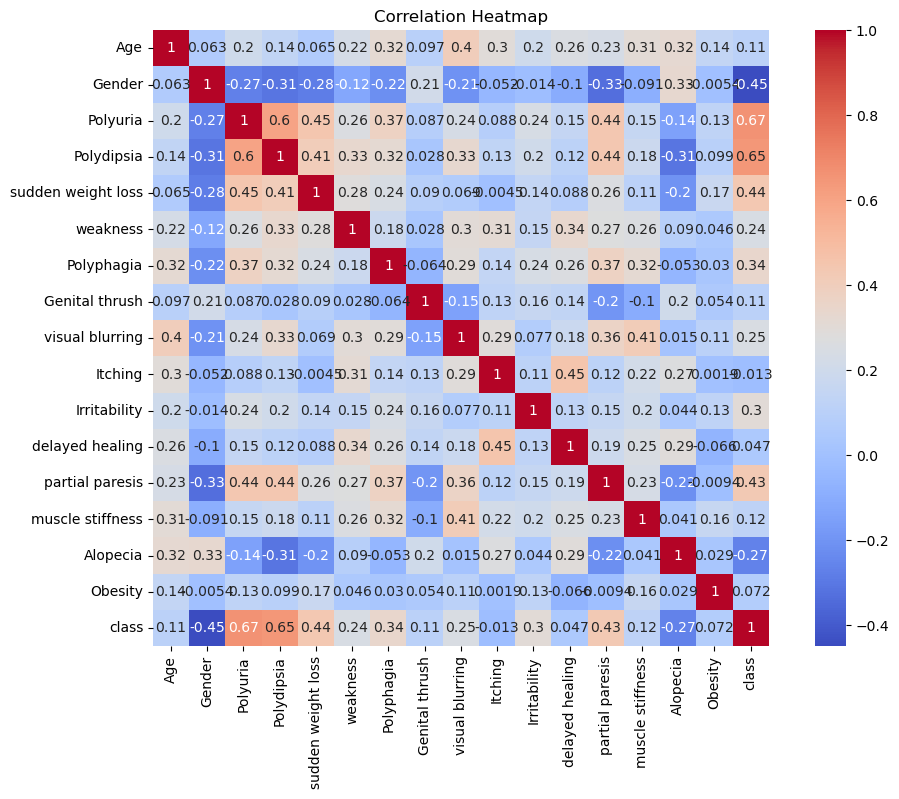

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', square = True)
plt.title('Correlation Heatmap')
plt.show()

Let's try the classification of diabetes with a Decision Tree

In [22]:
features = []
for column in df_encoded.columns:
    if column != "class":
        features.append(column)
print(features)

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']


In [31]:
X = df_encoded[features]
Y = df_encoded['class']

Let's split the data to train our model

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

Now we can fit the model to our training batch

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree = dtree.fit(X_train, Y_train)

We can now try our model on the test batch

In [36]:
Y_pred = dtree.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9807692307692307


We have a pretty good accuracy.

Let's try to visualize the decision tree :

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
!pip install pydotplus
import pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 660.6 kB/s eta 0:00:01
     ------------------- ------------------ 143.4/278.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=9d5ab70ad7dc0bd1e388946bcf302fea70c12c5b8c6ed3cb857117b6a12c81df
  Stored in directory: c:\users\camil\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [45]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = features,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found